<a href="https://colab.research.google.com/github/Karthikj498/Student-dropout-prediction-using-machine-learning/blob/main/StudentDropoutPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import&Load CSV file

In [3]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
df = pd.read_csv('data1.csv')
df.head()


,Timestamp,Date of Birth,Name,Gender,Age,Degree,Year of Study,Acadamic Performance,GPA,Do you have any backlogs?,Attendance,Support System,Involment in Extra Curricular Activities,Financial Status,Are you thinking about droping out,Mention reasons below,Email address
0,11-06-2023 13:04,08-05-2001,manish,Male,NaN,B.E,3,Poor,7.20,Yes,Average,Family,Active,Excellent,Yes,Prefer Not to Say,karthikj498@gmail.com
1,03-06-2023 23:08,14-03-2002,Deeksha pk,Female,NaN,B.E,3,Good,8.30,NaN,Good,Family,Somewhat Active,Good,No,NaN,deekshapkottaryy@gmail.com
2,04-06-2023 12:13,13-06-2023,fluwafyugaff,Male,NaN,B.Sc,1,Excellent,43.00,NaN,Excellent,Family,Active,Excellent,No,NaN,suhasshettigar.k7@gmail.com
3,04-06-2023 12:18,21-09-2002,Shaun Crasta,Male,NaN,B.E,3,Good,8.25,No,Good,Family,Not Active,Average,No,NaN,shauncrasta2002@gmail.com
4,03-06-2023 23:19,19-04-2002,Srinivas A Rao,Male,NaN,B.E,3,Good,8.00,NaN,Good,Family,Somewhat Active,Average,No,NaN,sriniap18@gmail.com


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 302 non-null    object 
 1   Date of Birth                             302 non-null    object 
 2   Name                                      302 non-null    object 
 3   Gender                                    302 non-null    object 
 4   Age                                       0 non-null      float64
 5   Degree                                    302 non-null    object 
 6   Year of Study                             302 non-null    int64  
 7   Acadamic Performance                      302 non-null    object 
 8   GPA                                       302 non-null    float64
 9   Do you have any backlogs?                 264 non-null    object 
 10  Attendance                            

In [6]:
#check for missing values
df.isnull().sum()

Timestamp                                     0
Date of Birth                                 0
Name                                          0
Gender                                        0
Age                                         302
Degree                                        0
Year of Study                                 0
Acadamic Performance                          0
GPA                                           0
Do you have any backlogs?                    38
Attendance                                    0
Support System                                0
Involment in Extra Curricular Activities      0
Financial Status                              0
Are you thinking about droping out            0
Mention reasons below                       247
Email address                                 0
dtype: int64

In [7]:
data = pd.read_csv('data1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 302 non-null    object 
 1   Date of Birth                             302 non-null    object 
 2   Name                                      302 non-null    object 
 3   Gender                                    302 non-null    object 
 4   Age                                       0 non-null      float64
 5   Degree                                    302 non-null    object 
 6   Year of Study                             302 non-null    int64  
 7   Acadamic Performance                      302 non-null    object 
 8   GPA                                       302 non-null    float64
 9   Do you have any backlogs?                 264 non-null    object 
 10  Attendance                            

In [8]:
#Handling the missing values
data=data.drop('Age',axis=1)


In [9]:
data=data.drop('Mention reasons below',axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 302 non-null    object 
 1   Date of Birth                             302 non-null    object 
 2   Name                                      302 non-null    object 
 3   Gender                                    302 non-null    object 
 4   Degree                                    302 non-null    object 
 5   Year of Study                             302 non-null    int64  
 6   Acadamic Performance                      302 non-null    object 
 7   GPA                                       302 non-null    float64
 8   Do you have any backlogs?                 264 non-null    object 
 9   Attendance                                302 non-null    object 
 10  Support System                        

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Timestamp                                    0
Date of Birth                                0
Name                                         0
Gender                                       0
Degree                                       0
Year of Study                                0
Acadamic Performance                         0
GPA                                          0
Do you have any backlogs?                   38
Attendance                                   0
Support System                               0
Involment in Extra Curricular Activities     0
Financial Status                             0
Are you thinking about droping out           0
Email address                                0
dtype: int64


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
print("Data after imputation:\n", data_imputed)

Data after imputation:
             Timestamp Date of Birth             Name  Gender Degree  \
0    11-06-2023 13:04    08-05-2001           manish    Male    B.E   
1    03-06-2023 23:08    14-03-2002       Deeksha pk  Female    B.E   
2    04-06-2023 12:13    13-06-2023     fluwafyugaff    Male   B.Sc   
3    04-06-2023 12:18    21-09-2002     Shaun Crasta    Male    B.E   
4    03-06-2023 23:19    19-04-2002  Srinivas A Rao     Male    B.E   
..                ...           ...              ...     ...    ...   
297  28-06-2023 18:46    28-06-2001           Swathi  Female   B.Sc   
298  28-06-2023 18:47    28-06-2001             Yash    Male    BCA   
299  28-06-2023 18:47    28-06-2002          Krithik    Male    BCA   
300  28-06-2023 18:48    28-06-2001           Jathin    Male    BCA   
301  28-06-2023 18:49    28-06-2001           Lohith    Male    BCA   

    Year of Study Acadamic Performance   GPA Do you have any backlogs?  \
0               3                 Poor   7.2     

In [13]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Timestamp                                 302 non-null    object
 1   Date of Birth                             302 non-null    object
 2   Name                                      302 non-null    object
 3   Gender                                    302 non-null    object
 4   Degree                                    302 non-null    object
 5   Year of Study                             302 non-null    object
 6   Acadamic Performance                      302 non-null    object
 7   GPA                                       302 non-null    object
 8   Do you have any backlogs?                 302 non-null    object
 9   Attendance                                302 non-null    object
 10  Support System                            302 non-

In [14]:
data_1=data_imputed.copy()


Feature selection

In [15]:
data_2=data_1.drop(['Timestamp','Date of Birth','Name','Gender','Degree','Year of Study','Email address'],axis=1)

Convert to numerical

In [16]:
data_3=data_2.copy()

In [17]:
#conver the yes no and maybe to numerical values
# Define a mapping dictionary
mapping = {"Yes": 1, "No": 0,"Maybe":2}

# Apply the mapping to the column
data_3["Are you thinking about droping out"] = data_3["Are you thinking about droping out"].map(mapping)


In [18]:
data_3['GPA'] = data_3['GPA'].astype('float')


In [19]:
data_3.dtypes

Acadamic Performance                         object
GPA                                         float64
Do you have any backlogs?                    object
Attendance                                   object
Support System                               object
Involment in Extra Curricular Activities     object
Financial Status                             object
Are you thinking about droping out            int64
dtype: object

In [40]:
#identify unique values of each attribute
attribute_values = {'Acadamic Performance': data_3['Acadamic Performance'].unique(),
    'GPA': data_3['GPA'].unique(),
    'Do you have any backlogs?': data_3['Do you have any backlogs?'].unique(),
    'Attendance': data_3['Attendance'].unique(),
    'Support System': data_3['Support System'].unique(),
    'Involment in Extra Curricular Activities': data_3['Involment in Extra Curricular Activities'].unique(),
    'Financial Status ': data_3['Financial Status '].unique(),
    'Are you thinking about droping out': data_3['Are you thinking about droping out'].unique()
}

# Step 3: Print unique values
for attribute, values in attribute_values.items():
    print(attribute)
    print(values)
    print()

Acadamic Performance
['Poor' 'Good' 'Excellent' 'Average']

GPA
[  7.2    8.3   43.     8.25   8.     8.57   8.86   7.    80.     8.33
   7.92   7.25   8.5    8.9    9.34   8.7    7.4    8.76   8.1    8.4
   9.     7.5    9.35   6.5    7.72   8.2    6.8    9.3    7.29   8.56
   6.2    6.     7.96   5.    87.     9.2    9.45   7.39   8.99   9.25
   8.8    6.9    9.19   6.75   8.47   6.4    8.75   9.8    9.9    9.65
   8.77   9.6    8.61   3.5    7.1  100.     3.     8.6    8.44   8.81
   9.56   7.66   4.35   6.63   6.7    7.9    7.89   7.7    9.5   20.
   7.8    6.3    7.68   4.     8.69   9.15   8.55   7.01   7.86   6.68
   8.29]

Do you have any backlogs?
['Yes' 'No']

Attendance
['Average' 'Good' 'Excellent' 'Poor']

Support System
['Family' 'Teachers' 'Friends' 'Family and Friends' 'Myself' 'Family '
 'Priest ' 'All of the above' 'None' 'Myself ' 'All']

Involment in Extra Curricular Activities
['Active' 'Somewhat Active' 'Not Active']

Financial Status 
['Excellent' 'Good' 'Average

In [44]:
#transfer the processed data to another csv file
data_3.to_csv('preprocessed_student_data.csv', index=False)

In [45]:
#load that file
data_4= pd.read_csv('preprocessed_student_data.csv')
data_4

,Acadamic Performance,GPA,Do you have any backlogs?,Attendance,Support System,Involment in Extra Curricular Activities,Financial Status,Are you thinking about droping out
0,Poor,7.20,Yes,Average,Family,Active,Excellent,1
1,Good,8.30,No,Good,Family,Somewhat Active,Good,0
2,Excellent,43.00,No,Excellent,Family,Active,Excellent,0
3,Good,8.25,No,Good,Family,Not Active,Average,0
4,Good,8.00,No,Good,Family,Somewhat Active,Average,0
...,...,...,...,...,...,...,...,...
297,Good,8.80,No,Good,Family,Active,Excellent,0
298,Average,7.90,No,Average,Family,Somewhat Active,Good,0
299,Good,8.00,No,Good,Friends,Somewhat Active,Good,0
300,Good,8.50,No,Average,Friends,Somewhat Active,Good,0


In [46]:
data_4.head()

,Acadamic Performance,GPA,Do you have any backlogs?,Attendance,Support System,Involment in Extra Curricular Activities,Financial Status,Are you thinking about droping out
0,Poor,7.20,Yes,Average,Family,Active,Excellent,1
1,Good,8.30,No,Good,Family,Somewhat Active,Good,0
2,Excellent,43.00,No,Excellent,Family,Active,Excellent,0
3,Good,8.25,No,Good,Family,Not Active,Average,0
4,Good,8.00,No,Good,Family,Somewhat Active,Average,0


In [47]:
#Converting Categorical variables into numeric values
from sklearn.preprocessing import LabelEncoder
categorical_attributes = ['Acadamic Performance',
   # 'GPA',
    'Do you have any backlogs?',
                          'Attendance',
                          'Support System',
                          'Involment in Extra Curricular Activities',
                          'Financial Status ',
                          'Are you thinking about droping out',
                          ]
encoder = LabelEncoder()
for attr in categorical_attributes:
    data_4[attr] = encoder.fit_transform(data_4[attr])

In [42]:
data_4.dtypes

Acadamic Performance                        int64
GPA                                         int64
Do you have any backlogs?                   int64
Attendance                                  int64
Support System                              int64
Involment in Extra Curricular Activities    int64
Financial Status                            int64
Are you thinking about droping out          int64
dtype: object

In [48]:
#identify unique values of each attribute
attribute_values = {'Acadamic Performance': data_4['Acadamic Performance'].unique(),
    'GPA': data_4['GPA'].unique(),
    'Do you have any backlogs?': data_4['Do you have any backlogs?'].unique(),
    'Attendance': data_4['Attendance'].unique(),
    'Support System': data_4['Support System'].unique(),
    'Involment in Extra Curricular Activities': data_4['Involment in Extra Curricular Activities'].unique(),
    'Financial Status ': data_4['Financial Status '].unique(),
    'Are you thinking about droping out': data_4['Are you thinking about droping out'].unique()
}

# Step 3: Print unique values
for attribute, values in attribute_values.items():
    print(attribute)
    print(values)
    print()

Acadamic Performance
[3 2 1 0]

GPA
[  7.2    8.3   43.     8.25   8.     8.57   8.86   7.    80.     8.33
   7.92   7.25   8.5    8.9    9.34   8.7    7.4    8.76   8.1    8.4
   9.     7.5    9.35   6.5    7.72   8.2    6.8    9.3    7.29   8.56
   6.2    6.     7.96   5.    87.     9.2    9.45   7.39   8.99   9.25
   8.8    6.9    9.19   6.75   8.47   6.4    8.75   9.8    9.9    9.65
   8.77   9.6    8.61   3.5    7.1  100.     3.     8.6    8.44   8.81
   9.56   7.66   4.35   6.63   6.7    7.9    7.89   7.7    9.5   20.
   7.8    6.3    7.68   4.     8.69   9.15   8.55   7.01   7.86   6.68
   8.29]

Do you have any backlogs?
[1 0]

Attendance
[0 2 1 3]

Support System
[ 2 10  5  4  6  3  9  1  8  7  0]

Involment in Extra Curricular Activities
[0 2 1]

Financial Status 
[1 2 0 3]

Are you thinking about droping out
[1 0 2]



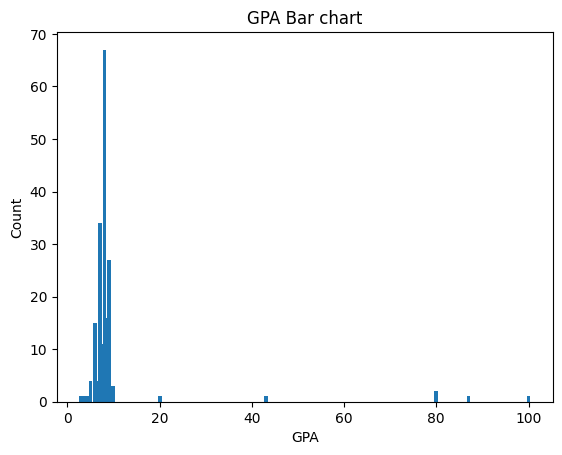

In [49]:
import matplotlib.pyplot as plt
#display bar chart
fcounts = data_4['GPA'].value_counts()
plt.bar(fcounts.index, fcounts.values)
plt.title('GPA Bar chart')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()

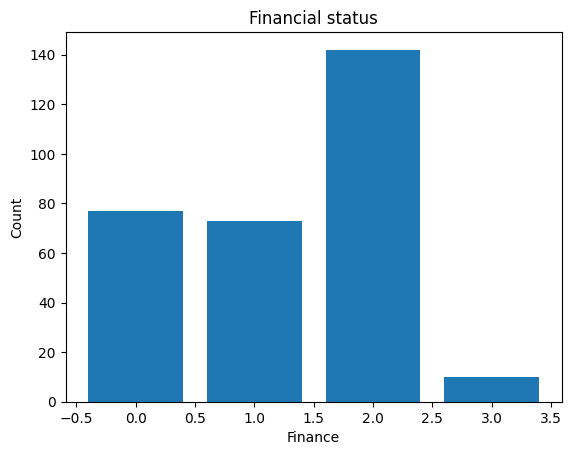

In [55]:
fcounts = data_4['Financial Status '].value_counts()
plt.bar(fcounts.index, fcounts.values)
plt.title('Financial status')
plt.xlabel('Finance')
plt.ylabel('Count')
plt.show()

**Start the model training**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
#train model
features = [              'Acadamic Performance',
                          'GPA',
                          'Do you have any backlogs?',
                          'Attendance',
                          'Support System',
                          'Involment in Extra Curricular Activities',
                          'Financial Status ',
                          ]

target = 'Are you thinking about droping out'

In [57]:
#train model
X_train, X_test, y_train, y_test = train_test_split(data_4[features], data_4[target], test_size=0.3, random_state=42)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [58]:
#find accuracy, error rate, precision,recall,fmeasure of trained data
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f_measure = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f_measure)

Accuracy: 0.7582417582417582
Error Rate: 0.2417582417582418
Precision: 0.8357884776671469
Recall: 0.7582417582417582
F-measure: 0.794798607985421


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        81
           1       0.29      0.33      0.31         6
           2       0.00      0.00      0.00         4

    accuracy                           0.76        91
   macro avg       0.40      0.39      0.39        91
weighted avg       0.84      0.76      0.79        91



**Confusion Matrix**

In [61]:
print(confusion_matrix(y_test,y_pred))

[[67  4 10]
 [ 3  2  1]
 [ 3  1  0]]


**Store the trained data**

In [62]:

import joblib
joblib.dump(classifier, 'decision_tree_classifier.pkl')

['decision_tree_classifier.pkl']

In [63]:
#test all the data based on the trained model
classifier = joblib.load('decision_tree_classifier.pkl')
X_test = data_4[features]



predictions = classifier.predict(X_test)

y_test = data_4['Are you thinking about droping out']
accuracy = accuracy_score(y_test, predictions)
error_rate = 1 - accuracy
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f_measure = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f_measure)

Accuracy: 0.9205298013245033
Error Rate: 0.07947019867549665
Precision: 0.9281448751301714
Recall: 0.9205298013245033
F-measure: 0.9232104320478514


In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       247
           1       0.84      0.82      0.83        33
           2       0.62      0.82      0.71        22

    accuracy                           0.92       302
   macro avg       0.81      0.86      0.83       302
weighted avg       0.93      0.92      0.92       302



In [65]:
#confusion matrix
print(confusion_matrix(y_test,predictions))

[[233   4  10]
 [  5  27   1]
 [  3   1  18]]


In [66]:
# outcomes of the data tested
print(predictions)

[1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 2 0 0 0 0
 0 0 0 0 0 2 0 0 2 0 0 1 0 0 0 2 0 1 0 0 0 2 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0
 0 2 0 2 0 0 1 0 0 0 1 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 0 2 0 0 0
 0 0 0 0 0 0]


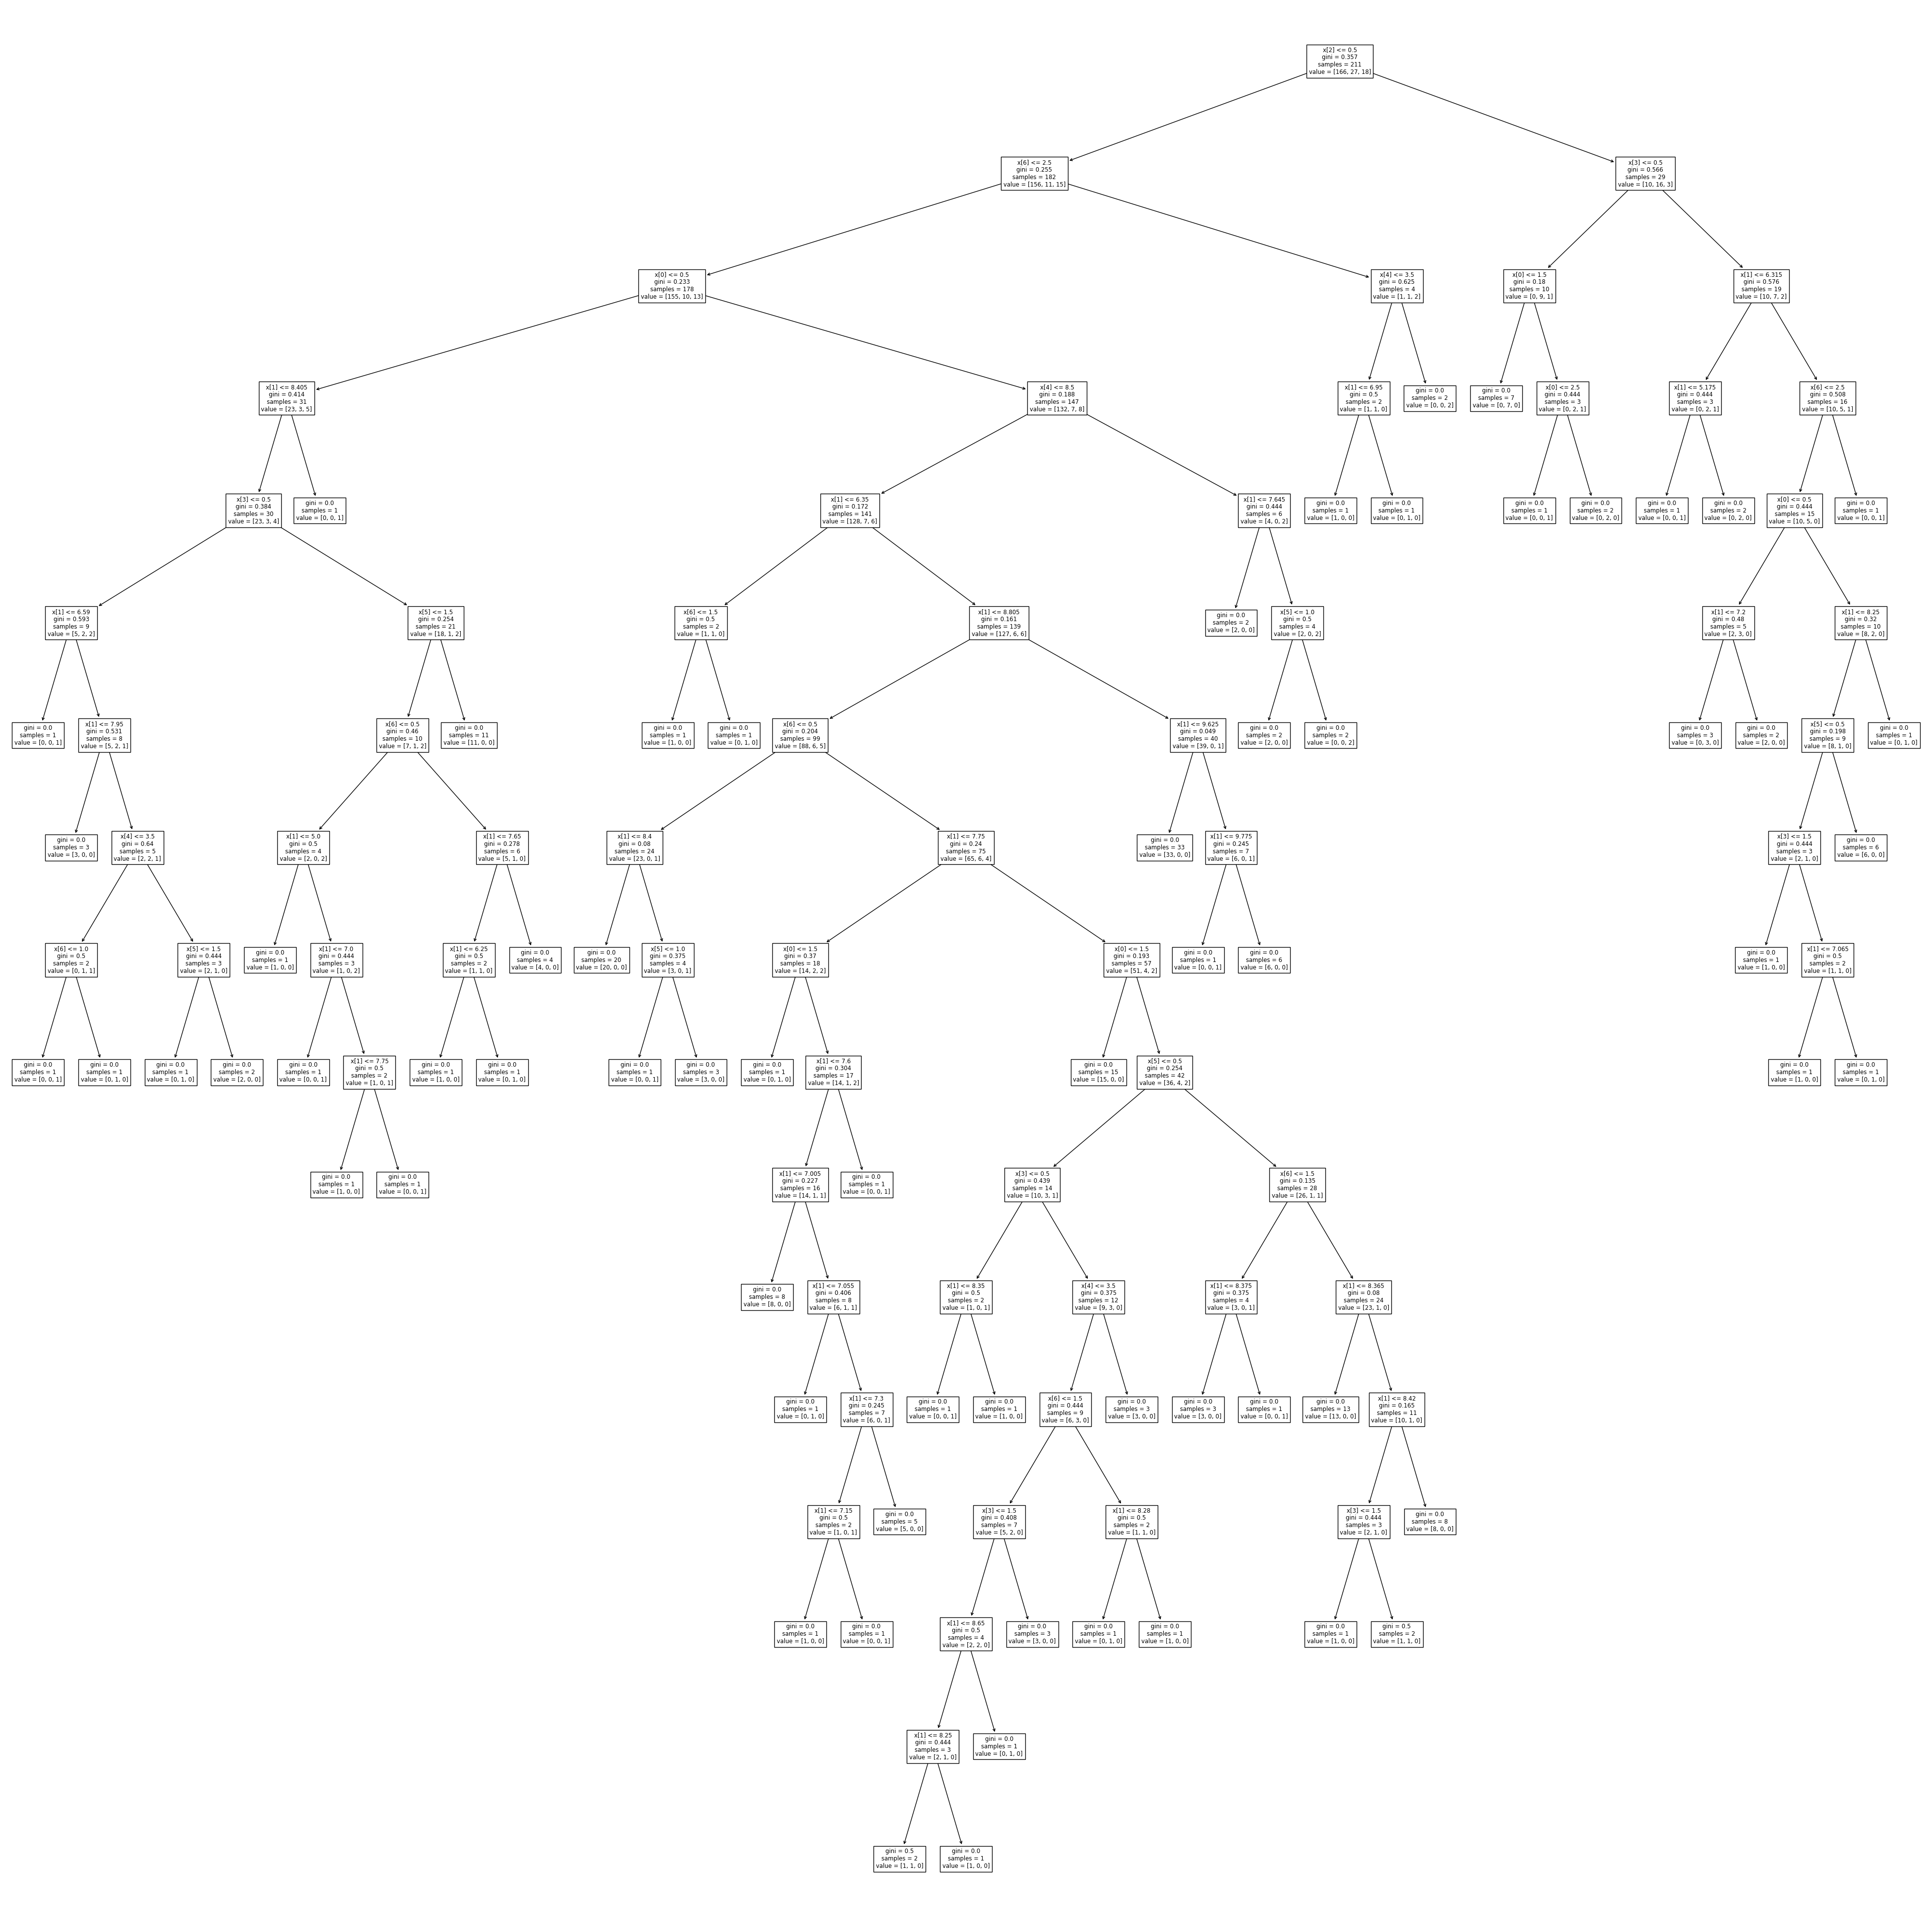

In [70]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(50, 50))
tree.plot_tree(classifier, ax=ax)
plt.show()

In [73]:
from pandas.core.window.expanding import ExpandingGroupby
from matplotlib.projections.polar import ThetaAxis
n = int(input("Enter no of Students who's status is to be determined :- "))

def Prediction() :
  Acadamic_Performance =int(input("Performance of student(Excellent:1, Good:2 , Average:0 ,poor:1) :- "))
  GPA = float(input("CGPA"))
  Bg = int(input("do u have any backlogs: yes(1),no(0)"))
  Attendance= int(input("attendance: Average(0),Good(2),Excellent(1),Poor(3) "))
  ss = int(input("Support system: family(2), friends(5), teacher(10)  "))
  Activities= int(input("involvement in extra curricular activities: active(0), not active(1), somewhat active(2) "))
  Fs = int(input("Financial status:Excellent(1), good(2), average(0), poor(3) "))

  new_student = np.array([Acadamic_Performance, GPA,Bg,Attendance,ss, Activities,Fs])

  new_student = new_student.reshape(1,-1) #converting to 2D array

  if classifier.predict(new_student) == 1:
     return "The student is thinking of dropping out!!!"
  elif classifier.predict(new_student)==2 :
    return "The student may have a thought of dropping out"
  elif classifier.predict(new_student==0):
      return "The student doesnt have any thoughts of dropping out"

for i in range(n) :
   print(Prediction())

Enter no of Students who's status is to be determined :- 1
Performance of student(Excellent:1, Good:2 , Average:0 ,poor:1) :- 1
CGPA9
do u have any backlogs: yes(1),no(0)0
attendance: Average(0),Good(2),Excellent(1),Poor(3) 1
Support system: family(2), friends(5), teacher(10)  2
involvement in extra curricular activities: active(0), not active(1), somewhat active(2) 1
Financial status:Excellent(1), good(2), average(0), poor(3) 1
The student doesnt have any thoughts of dropping out


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
